## MOwNiT
### Julia Smerdel, ZadanieDomowe7

#### Zad 1. Implementacja wielomianów Legendre'a.

1. $P_0(x) = 1$
2. $P_1(x) = x$
3. $P_{k+1} = \frac {2k+1}{k+1}xP_k(x) - \frac{k}{k+1}P_{k-1}(x)$

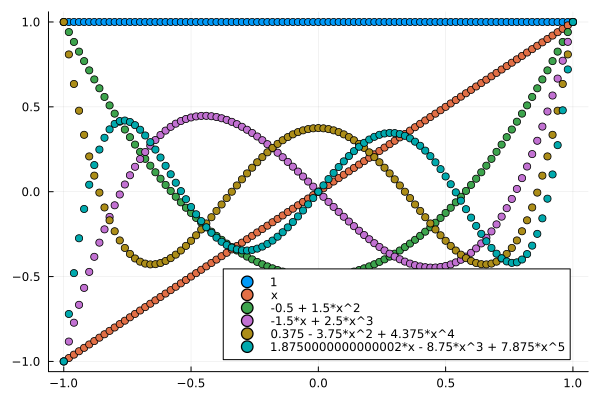

In [1]:
using Polynomials
using Plots
using QuadGK
p0 = Polynomial([1])
p1 = Polynomial([0,1])
p2 = 3/2*p1*p1 - 1/2*p0
p3 = 5/3*p1*p2 - 2/3*p1
p4 = 7/4*p1*p3 - 3/4*p2
p5 = 9/5*p1*p4 - 4/5*p3
xVal = -1:1
scatter(p0, extrema(xVal)...)
scatter!(p1, extrema(xVal)...)
scatter!(p2, extrema(xVal)...)
scatter!(p3, extrema(xVal)...)
scatter!(p4, extrema(xVal)...)
scatter!(p5, extrema(xVal)...)



In [2]:
#abscissa - the distance from a point to the vertical or y -axis

println("Legrenge: ", roots(p2))
(abscissa, coeffs) = gauss(Float64,2)
println("Gauss: ", abscissa)
println()
println("Legrende: ", sort(roots(p3)))
(abscissa, coeffs) = gauss(Float64,3)
println("Gauss: ", abscissa)
println()
println("Legrende: ", roots(p4))
(abscissa, coeffs) = gauss(Float64,4)
println("Gauss: ", abscissa)

println()
println()
println()

Legrenge: [-0.5773502691896258, 0.5773502691896256]
Gauss: [-0.5773502691896258, 0.5773502691896258]

Legrende: [-0.7745966692414834, 0.0, 0.7745966692414835]
Gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]

Legrende: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]





Podstawowe twierdzenie kwadratur Gaussa:

Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a, b]$ są zerami wielomianu ortogonalnego $\varphi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.


#### Zad 2. Punkty Gaussa i liczenie całki.

In [3]:
function GaussIntegral(k, f)
    x, w = gauss(k) # Integral = Sum(i=1, k) wi * f(xi)
    return sum(w .* f.(x))
end

GaussIntegral (generic function with 1 method)

In [4]:
test = [[if j != i 0 else i end for i in 1:j] for j in 1:10]
test

# 2 * x
# 3 * x^2
# 4 * x^3
# 5 * x^4

10-element Vector{Vector{Int64}}:
 [1]
 [0, 2]
 [0, 0, 3]
 [0, 0, 0, 4]
 [0, 0, 0, 0, 5]
 [0, 0, 0, 0, 0, 6]
 [0, 0, 0, 0, 0, 0, 7]
 [0, 0, 0, 0, 0, 0, 0, 8]
 [0, 0, 0, 0, 0, 0, 0, 0, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]

In [5]:
for i in 1:10
    poly = Polynomial(test[i])
    println("Degree: ", i-1, "   Polynomial: ", poly, "   GaussIntegral: ",GaussIntegral(3, poly), "        Real value: ", 1^length(poly) - ((-1)^length(poly)))
end

Degree: 0   Polynomial: 1   GaussIntegral: 1.9999999999999998        Real value: 2
Degree: 1   Polynomial: 2*x   GaussIntegral: 0.0        Real value: 0
Degree: 2   Polynomial: 3*x^2   GaussIntegral: 2.0        Real value: 2
Degree: 3   Polynomial: 4*x^3   GaussIntegral: 0.0        Real value: 0
Degree: 4   Polynomial: 5*x^4   GaussIntegral: 2.0        Real value: 2
Degree: 5   Polynomial: 6*x^5   GaussIntegral: 0.0        Real value: 0
Degree: 6   Polynomial: 7*x^6   GaussIntegral: 1.6800000000000006        Real value: 2
Degree: 7   Polynomial: 8*x^7   GaussIntegral: 0.0        Real value: 0
Degree: 8   Polynomial: 9*x^8   GaussIntegral: 1.2960000000000005        Real value: 2
Degree: 9   Polynomial: 10*x^9   GaussIntegral: 0.0        Real value: 0


Problem pojawia się przy stopniu 6. Im większa liczba punktów Gaussa, tym większa dokładność obliczeń.

Dokładność kwadratury Gaussa: Kwadratura ma stopień dokładności $2n-1$, gdzie n to liczba punktów Gaussa. 

#### Zad 3. Funkcja licząca całki.

In [6]:
function integralVal(k, f, a, b) # a - start, b - end, k - Gauss' points, f - function
    x, w = gauss(k)
    x = (b+a)/2 .+ (b-a)/2 * x 
    return (b-a)/2 * sum(w .* f.(x))
end

integralVal (generic function with 1 method)

In [7]:
println("Function: 2x^3 - 4x + 7, Interval: [1, 10], Real Value: 4864.5")
println()
fun = x -> 2*x^3 - 4*x + 7
a = 1
b = 10
for i in 1:5
    println("Gauss' points: ", i, "  Function value: ", integralVal(i, fun , a, b))
end

Function: 2x^3 - 4x + 7, Interval: [1, 10], Real Value: 4864.5

Gauss' points: 1  Function value: 2859.75
Gauss' points: 2  Function value: 4864.499999999999
Gauss' points: 3  Function value: 4864.5
Gauss' points: 4  Function value: 4864.500000000002
Gauss' points: 5  Function value: 4864.5


In [8]:
println("Function: 6x^14 + 76x^13 + 32x^9 - 18x^6, Interval: [-1, 1], Real Value: -4.3429")
println()
fun = x -> 6*x^14 + 76*x^13 + 32*x^9 - 18*x^6
a = -1
b = 1
for i in 1:10
    println("Gauss' points: ", i, "  Function value: ", integralVal(i, fun , a, b))
end

Function: 6x^14 + 76x^13 + 32x^9 - 18x^6, Interval: [-1, 1], Real Value: -4.3429

Gauss' points: 1  Function value: 0.0
Gauss' points: 2  Function value: -1.327846364883403
Gauss' points: 3  Function value: -4.133376
Gauss' points: 4  Function value: -4.628117332064021
Gauss' points: 5  Function value: -4.426058567655947
Gauss' points: 6  Function value: -4.357162449252178
Gauss' points: 7  Function value: -4.343969938375532
Gauss' points: 8  Function value: -4.342857142857125
Gauss' points: 9  Function value: -4.342857142857146
Gauss' points: 10  Function value: -4.342857142857145


In [9]:
println("Function: e^(3^x)/(5x^2-2x), Interval: [-20, -3], Real Value: 0.0531298")
println()
fun = x -> exp(3^x)/(5*x^2 - 2*x)
a = -20
b = -3
for i in 1:12
    println("Gauss' points: ", i, "  Function value: ", integralVal(i, fun , a, b))
end

Function: e^(3^x)/(5x^2-2x), Interval: [-20, -3], Real Value: 0.0531298

Gauss' points: 1  Function value: 0.024844801469924953
Gauss' points: 2  Function value: 0.043068652140752145
Gauss' points: 3  Function value: 0.05017133666828521
Gauss' points: 4  Function value: 0.05233442558036416
Gauss' points: 5  Function value: 0.05292744034656787
Gauss' points: 6  Function value: 0.05308053211504932
Gauss' points: 7  Function value: 0.05311824684740114
Gauss' points: 8  Function value: 0.05312717858661928
Gauss' points: 9  Function value: 0.05312922761463729
Gauss' points: 10  Function value: 0.0531296861795935
Gauss' points: 11  Function value: 0.05312978682274005
Gauss' points: 12  Function value: 0.05312980856250866


#### Zad 4. Całkowanie Gauss-Kronroda.

In [10]:
poly = Polynomial([0, 0, -12, -3, 0, 1])
println("Polynomial: ", poly, "  Interval: [-7, 4]")
println("Expected: -18944.75,  Gauss-Kronrod: ", quadgk(poly, -7, 4)[1], " error: ", quadgk(poly, -7, 4)[2])

Polynomial: -12*x^2 - 3*x^3 + x^5  Interval: [-7, 4]
Expected: -18944.75,  Gauss-Kronrod: -18944.750000000004 error: 3.637978807091713e-12


In [11]:
gaussFun(x) = 1/sqrt(2*pi)*exp(-x^2/2)
println("Polynomial: ", gaussFun, "  Interval: [-inf, inf]")
println("Expected: 1,  Gauss-Kronrod: ", quadgk(gaussFun, -Inf, Inf)[1], " error: ", quadgk(gaussFun, -Inf, Inf)[2])

Polynomial: gaussFun  Interval: [-inf, inf]
Expected: 1,  Gauss-Kronrod: 1.0000000000032583 error: 1.4395584886006938e-8


#### Zad 5. Własne funkcje całkujące.

------- Metoda prostokątków -------

In [12]:
function rectangleIntegral(f, a, b, n)
    h = (b-a)/n
    val = 0
    for i in 1:n
        val += f(a + (i-1)*h + h/2)*h
    end
    return val
end

rectangleIntegral (generic function with 1 method)

------- Metoda trapezów -------

In [13]:
function trapezIntegral(f, a, b, n)
    h = (b-a)/n
    val = 0
    for i in 1:n
        tmp = f(a+(i-1)*h)
        tmp2 = f(a+(i*h))
        val += 0.5*(tmp+tmp2)*h
    end
    return val
end

trapezIntegral (generic function with 1 method)

------- Metoda Simpsona -------

In [14]:
function simpsonIntegral(f, a, b, n)
    val  = 0
    tmp = 0
    h = (b-a)/n
    for i in 1:n
        x = a + i * h
        tmp += f(x - h / 2)
        if i < n 
            val += f(x)
        end
    end
    val = h / 6 * (f(a) + f(b) + 2 * val + 4 * tmp)
    return val
end

simpsonIntegral (generic function with 1 method)

In [15]:
using DataFrames
expected = 43.281
a = 1
b = 5
testFun(x) = 2^x
df = DataFrame(Points=Int64[], h = Float64[], Type=String[], Error=Float64[])
for i in 10:100
    h = (b-a)/i
    push!(df, (i, h, "rectangle", abs(expected - rectangleIntegral(testFun, a, b, i))))
    push!(df, (i, h, "trapez", abs(expected - trapezIntegral(testFun, a, b, i))))
    push!(df, (i, h, "Simpson", abs(expected - simpsonIntegral(testFun, a, b, i))))
end
stats = combine(groupby(df, [:Type, :Points, :h]), "Error")
stats

Row,Type,Points,h,Error
,String,Int64,Float64,Float64
1,rectangle,10,0.4,0.138468
2,trapez,10,0.4,0.276756
3,Simpson,10,0.4,6.01695e-5
4,rectangle,11,0.363636,0.114507
5,trapez,11,0.363636,0.228749
6,Simpson,11,0.363636,8.82317e-5
7,rectangle,12,0.333333,0.0962695
8,trapez,12,0.333333,0.192221
9,Simpson,12,0.333333,0.000106014


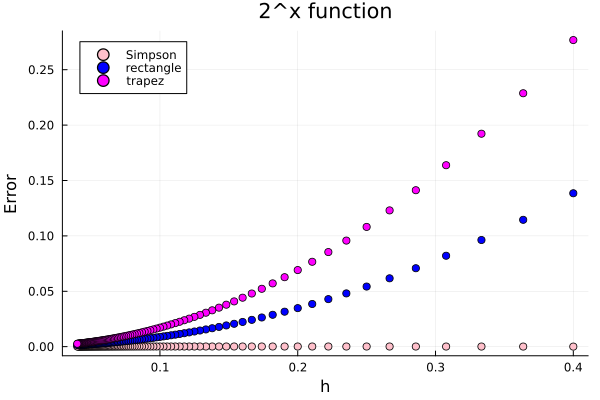

In [16]:
scatter(stats.h, stats.Error, group=stats.Type, colour=[:pink :blue :magenta], xlabel="h", ylabel="Error", title="2^x function")

In [17]:
using DataFrames
expected = 0
a = 0
b = 2*pi
testFun(x) = sin(x)
df = DataFrame(Points=Int64[], h = Float64[], Type=String[], Error=Float64[])
for i in 10:100
    h = (b-a)/i
    push!(df, (i, h, "rectangle", abs(expected - rectangleIntegral(testFun, a, b, i))))
    push!(df, (i, h, "trapez", abs(expected - trapezIntegral(testFun, a, b, i))))
    push!(df, (i, h, "Simpson", abs(expected - simpsonIntegral(testFun, a, b, i))))
end
stats = combine(groupby(df, [:Type, :Points, :h]), "Error")
stats

Row,Type,Points,h,Error
,String,Int64,Float64,Float64
1,rectangle,10,0.628319,1.66533e-16
2,trapez,10,0.628319,5.55112e-17
3,Simpson,10,0.628319,1.41911e-16
4,rectangle,11,0.571199,4.996e-16
5,trapez,11,0.571199,5.55112e-17
6,Simpson,11,0.571199,6.12372e-17
7,rectangle,12,0.523599,8.04912e-16
8,trapez,12,0.523599,2.77556e-17
9,Simpson,12,0.523599,5.01806e-16


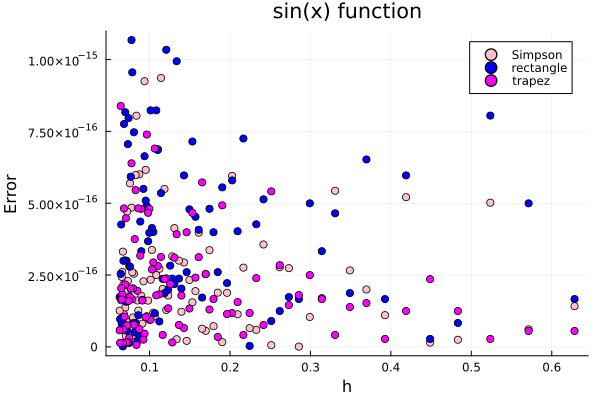

In [18]:
scatter(stats.h, stats.Error, group=stats.Type, colour=[:pink :blue :magenta], xlabel="h", ylabel="Error", title="sin(x) function")